<a href="https://colab.research.google.com/github/Fabrici086/Imagenes/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 - Procesamiento de Imágenes



# Ejercicio 1

Imagen redimensionada para Twitter. Guardada como 'redimensionada_Twitter.jpg' con dimensiones: (1024, 512)


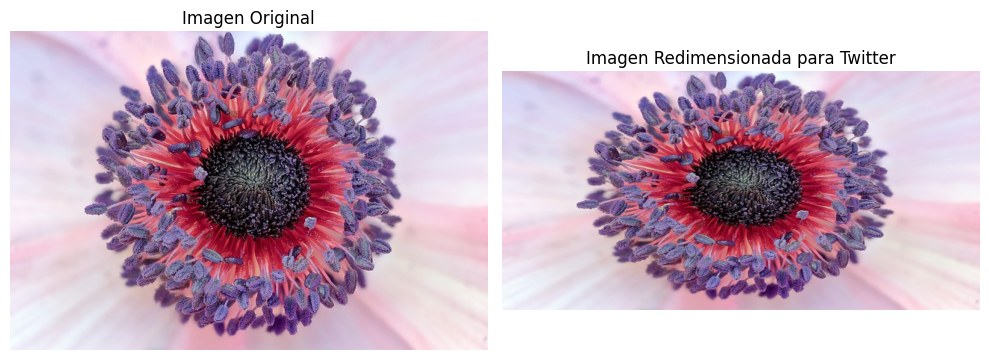

In [9]:
from PIL import Image
import requests  # Importa el módulo para realizar solicitudes HTTP
from io import BytesIO  # Importa BytesIO  que permite trabajar con datos en memoria como archivos binarios
import matplotlib.pyplot as plt  # Importa pyplot para trazar gráficos

def redimensionar_imagen(url_imagen, plataforma):
    """
    Permite redimensionar una imagen descargada desde una URL (preferentemente Github) para adaptarla a diferentes plataformas sociales, como Youtube, Instagram, Twitter o Facebook.

    Argumentos:
        url_imagen (str): La URL de la imagen que se va a redimensionar.
        plataforma (str): La plataforma social para la que se va a redimensionar la imagen. Las opciones válidas son: "Youtube", "Instagram", "Twitter" o "Facebook".

    Esta función descarga la imagen desde la URL proporcionada, la redimensiona de acuerdo con las dimensiones predefinidas y guarda la imagen redimensionada con un nombre específico.
    Por último, muestra la imágene original y la redimensionada.
    """
    dimensiones = {
        "Youtube": (1280, 720),
        "Instagram": (1080, 1080),
        "Twitter": (1024, 512),
        "Facebook": (1200, 630)
    }

    response = requests.get(url_imagen) # Obtener la imagen desde la URL de GitHub
    imagen = Image.open(BytesIO(response.content)) # Abre la imagen

    if plataforma in dimensiones:
        nueva_resolucion = dimensiones[plataforma]

        imagen_redimensionada = imagen.resize(nueva_resolucion)

        nombre_redimensionada = f"redimensionada_{plataforma}.jpg" # Genera el nombre
        imagen_redimensionada.save(nombre_redimensionada) # Guarda la nueva imagen

        print(f"Imagen redimensionada para {plataforma}. Guardada como '{nombre_redimensionada}' con dimensiones: {nueva_resolucion}")

        # Mostrar la imagen original y la imagen redimensionada
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(imagen)
        plt.title('Imagen Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(imagen_redimensionada)
        plt.title(f'Imagen Redimensionada para {plataforma}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Plataforma no compatible. Las opciones son: Youtube, Instagram, Twitter o Facebook.")

# URL directa de la imagen en GitHub
url_imagen_github = "https://github.com/Fabrici086/Imagenes/blob/main/imagen%20prueba.jpg?raw=true"

plataforma_deseada = "Twitter"
# LLamar a la función
redimensionar_imagen(url_imagen_github, plataforma_deseada)


# Ejercicio 2

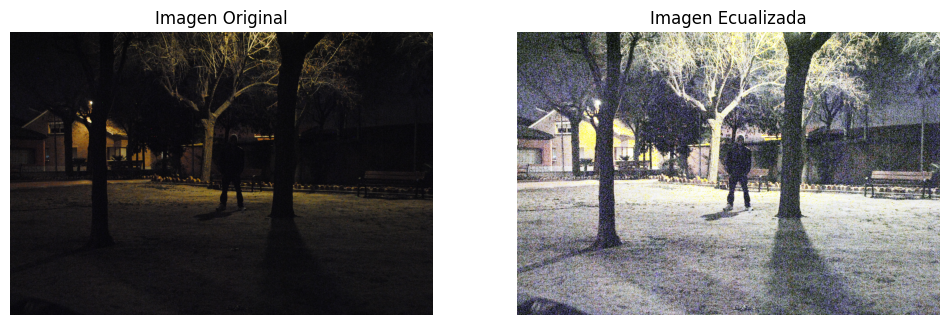

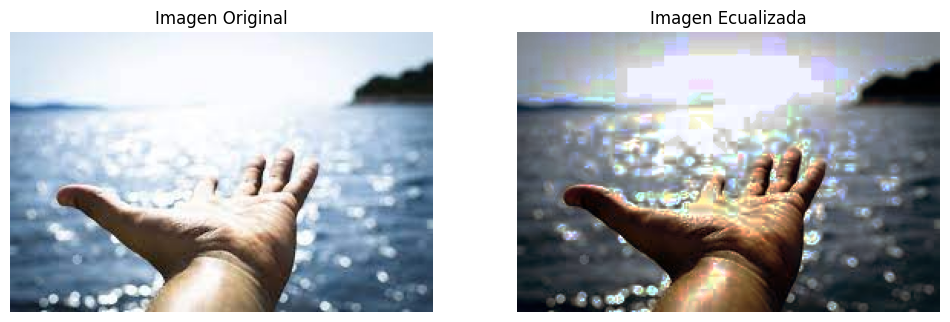

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

def ajustar_contraste(url_imagen):
    """
    Ajusta el contraste y ecualiza el histograma de color de una imagen desde una URL de GitHub.

    Argumentos:
    url_imagen (str): URL de la imagen de GitHub que se procesará.

    Esta función descarga la imagen desde la URL proporcionada, ajusta su contraste y ecualiza su histograma de color.
    Por último, muestra la imagen original y la imagen ecualizada en un gráfico.
    """
    response = requests.get(url_imagen) # Obtener la imagen desde la URL de GitHub
    arr = np.asarray(bytearray(response.content), dtype=np.uint8) # Convertir la imagen en una matriz NumPy
    imagen = cv2.imdecode(arr, cv2.IMREAD_COLOR) # Decodificar la matriz NumPy en una imagen OpenCV
    canales = cv2.split(imagen) # Dividir la imagen en canales de color
    canales_ecualizada = [cv2.equalizeHist(canal) for canal in canales] # Recorre y aplica la ecualización del histograma a cada canal
    imagen_ecualizada = cv2.merge(canales_ecualizada) # Combina los canales ecualizados

    # Mostrar la imagen original y la ecualizada
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_ecualizada, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Ecualizada')
    plt.axis('off')

    plt.show()

# URL directa de la imagen en GitHub
url_imagen_oscura = "https://github.com/Fabrici086/Imagenes/blob/main/Imagen_oscura_2.jpg?raw=true"
url_imagen_exceso_luz = "https://github.com/Fabrici086/Imagenes/blob/main/exceso_luz_2.jpg?raw=true"
# LLamar a la función
ajustar_contraste(url_imagen_oscura)
ajustar_contraste(url_imagen_exceso_luz)


# Ejercicio 3


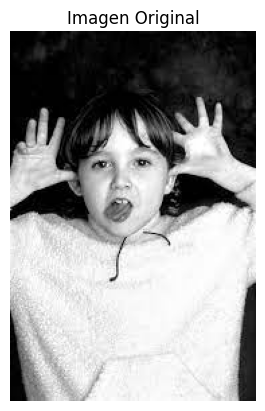

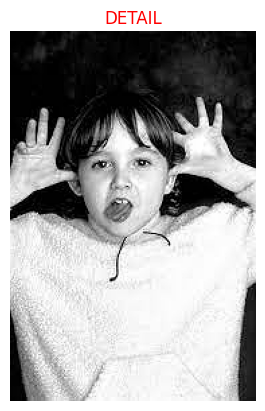

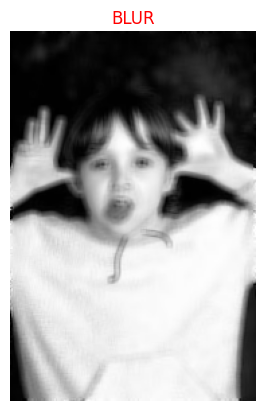

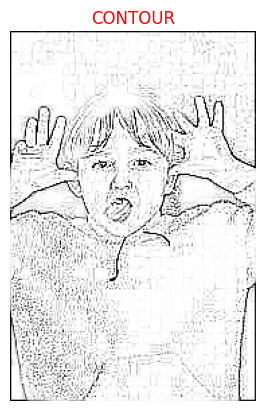

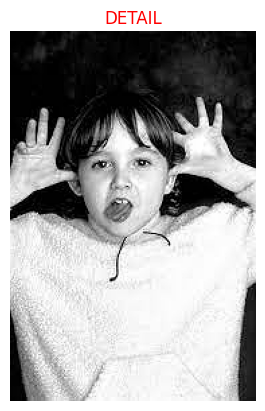

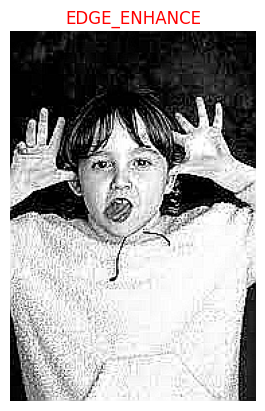

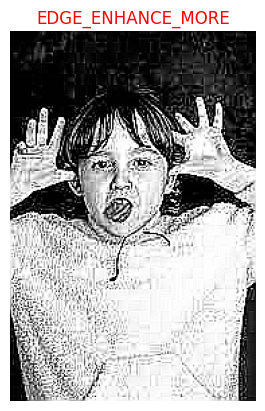

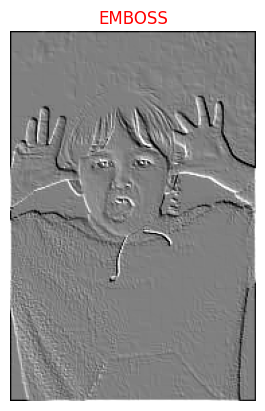

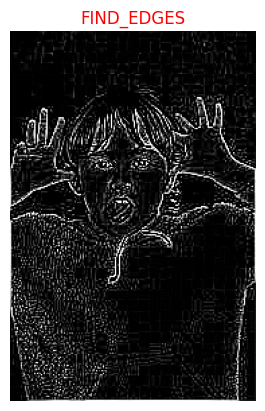

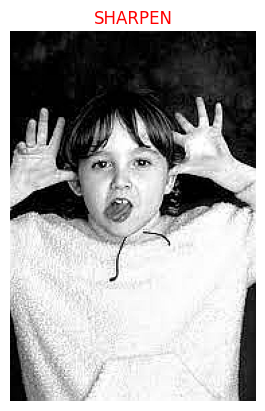

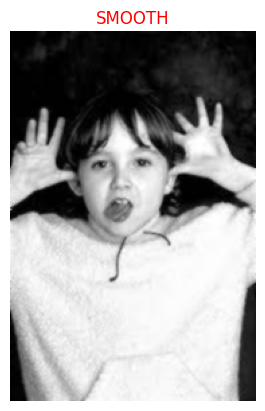

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def aplicar_filtro(imagen, nombre_filtro):
    """
    Aplica un filtro específico a una imagen y muestra el resultado.

    Argumentos:
    imagen: La imagen a la que se le aplicará el filtro.
    nombre_filtro (str): El nombre del filtro a aplicar.

    Filtros disponibles:
    1. BLUR: Suaviza la imagen.
    2. CONTOUR: Encuentra los bordes en la imagen.
    3. DETAIL: Realza los detalles de la imagen.
    4. EDGE_ENHANCE: Realza los bordes de la imagen.
    5. EMBOSS: Hace que la imagen parezca grabada.
    6. SHARPEN: Aumenta la nitidez de la imagen.
    7. SMOOTH: Hace que la imagen se vea suave.

    Esta función aplica el filtro solicitado a la imagen y muestra el resultado utilizando matplotlib.
    Por último, guarda la imagen filtrada con un nombre específico.
    """
    filtro = getattr(ImageFilter, nombre_filtro) # Obtener el filtro seleccionado
    imagen_filtrada = imagen.filter(filtro) # Aplicar el filtro
    # Mostrar la imagen con el filtro aplicado
    plt.imshow(imagen_filtrada)
    plt.title(nombre_filtro, color='red')
    plt.axis('off')
    plt.show()

    imagen_filtrada.save(f"imagen_filtrada_{nombre_filtro}.jpg") # Guardar la imagen filtrada

def aplicar_todos_filtros(imagen):
    """
    Aplica todos los filtros predefinidos a una imagen y muestra los resultados.

    Argumento:
    imagen: La imagen a la que se le aplicarán los filtros.

    Esta función itera sobre una lista de filtros predefinidos y aplica cada uno de ellos a la imagen.
    Por último, muestra las imágenes filtradas utilizando matplotlib.
    """
    filtros = [
        'BLUR',
        'CONTOUR',
        'DETAIL',
        'EDGE_ENHANCE',
        'EDGE_ENHANCE_MORE',
        'EMBOSS',
        'FIND_EDGES',
        'SHARPEN',
        'SMOOTH'
    ]
    # Aplicar cada filtro a la imagen y mostrar el resultado
    for filtro in filtros:
        aplicar_filtro(imagen, filtro)

# URL directa de la imagen en GitHub
url_imagen = "https://github.com/Fabrici086/Imagenes/blob/main/boceto_1.jpg?raw=true"
response = requests.get(url_imagen)
imagen = Image.open(BytesIO(response.content))
# Mostrar Imagen Original
plt.imshow(imagen)
plt.title('Imagen Original', color='black')
plt.axis('off')
plt.show()

# Aplicar filtro deseado (por ejemplo, 'DETAIL')
filtro_deseado = 'DETAIL'
aplicar_filtro(imagen, filtro_deseado)

# Aplicar todos los filtros en simultáneo
aplicar_todos_filtros(imagen)

# Ejercicio 4

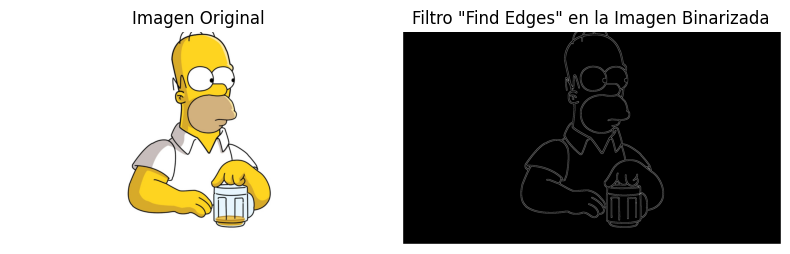

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

def binarizar_imagen(imagen, umbral):
    """
    Binariza una imagen dada utilizando un umbral específico.

    Argumentos:
    imagen: La imagen a binarizar.
    umbral (int): El valor de umbral para la binarización.

    Esta función convierte la imagen a escala de grises, aplica un umbral y crea una nueva imagen binarizada a partir del umbral.
    """
    imagen_gris = imagen.convert("L")  # Convierte la imagen a escala de grises
    imagen_array = np.array(imagen_gris)  # Convierte la imagen a un array NumPy
    imagen_binarizada = np.where(imagen_array > umbral, 255, 0) # Aplica un umbral para binarizar la imagen
    nueva_imagen = Image.fromarray(imagen_binarizada.astype('uint8')) # Crear una nueva imagen a partir del array binarizado

    return nueva_imagen

url_imagen = "https://github.com/Fabrici086/Imagenes/blob/main/boceto_3.jpg?raw=true"

response = requests.get(url_imagen)
imagen = Image.open(BytesIO(response.content))
umbral = 100 # Definir un umbral para la binarización
imagen_binarizada = binarizar_imagen(imagen, umbral) # Aplicar la binarización a la imagen
edges = imagen_binarizada.filter(ImageFilter.FIND_EDGES) # Aplicar el filtro "Find Edges" a la imagen binarizada

# Mostrar la imagen original y la imagen final
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')  # Muestra la imagen con filtro "Find Edges"
plt.title('Filtro "Find Edges" en la Imagen Binarizada')
plt.axis('off')

plt.tight_layout()
plt.show()


# Ejercicio 5


Selecciona una opción:
1. Cargar la imagen desde GitHub
2. Redimensionar imagen para una plataforma
3. Ajustar contraste y ecualizar histograma de color
4. Aplicar filtro a la imagen
5. Aplicar todos los filtros en simultáneo
6. Binarizar imagen y resaltar bordes
7. Salir
Ingresa el número de la opción deseada: 1
Por favor, introduce la URL de la imagen en GitHub: https://github.com/Fabrici086/Imagenes/blob/main/Imagen_oscura_2.jpg?raw=true

Selecciona una opción:
1. Cargar la imagen desde GitHub
2. Redimensionar imagen para una plataforma
3. Ajustar contraste y ecualizar histograma de color
4. Aplicar filtro a la imagen
5. Aplicar todos los filtros en simultáneo
6. Binarizar imagen y resaltar bordes
7. Salir
Ingresa el número de la opción deseada: 3


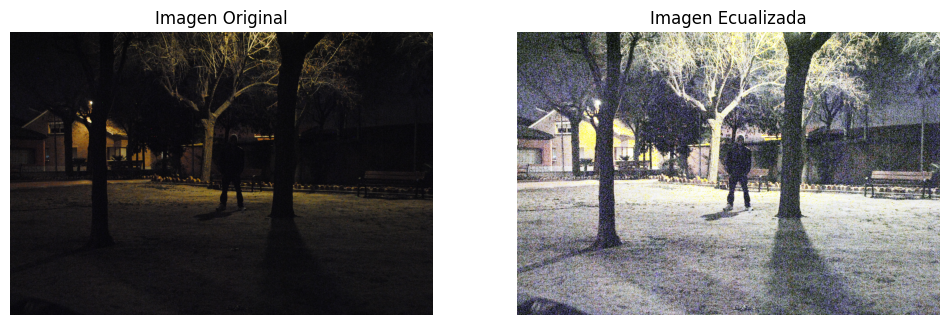


Selecciona una opción:
1. Cargar la imagen desde GitHub
2. Redimensionar imagen para una plataforma
3. Ajustar contraste y ecualizar histograma de color
4. Aplicar filtro a la imagen
5. Aplicar todos los filtros en simultáneo
6. Binarizar imagen y resaltar bordes
7. Salir
Ingresa el número de la opción deseada: 7
Saliendo del Programa...


In [11]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

def solicitar_url_imagen():
  """
  Esta función solicita al usuario que introduzca la URL de una imagen en GitHub.

  Argumentos: no recibe

  Valor de retorno: Devuelve la URL de la imagen en GitHub.
  """
  url_imagen = input("Por favor, introduce la URL de la imagen en GitHub: ")
  return url_imagen

def descargar_imagen_desde_github(url_imagen):
    """
    Descarga una imagen desde una URL de GitHub y la carga como un objeto de imagen utilizando las bibliotecas requests y Pillow.

    Argumentos:
    url_imagen: URL de la imagen en GitHub que se desea descargar (cadena de texto).

    Valor de retorno: devuelve la imagen descargada desde la URL de GitHub.
    """
    response = requests.get(url_imagen)
    imagen = Image.open(BytesIO(response.content))
    return imagen

def redimensionar_imagen(url_imagen, plataforma):
    dimensiones = {
        "Youtube": (1280, 720),
        "Instagram": (1080, 1080),
        "Twitter": (1024, 512),
        "Facebook": (1200, 630)
    }

    response = requests.get(url_imagen)
    imagen = Image.open(BytesIO(response.content))

    if plataforma in dimensiones:
        nueva_dimension = dimensiones[plataforma]

        imagen_redimensionada = imagen.resize(nueva_dimension)

        nombre_redimensionada = f"redimensionada_{plataforma}.jpg"
        imagen_redimensionada.save(nombre_redimensionada)

        print(f"Imagen redimensionada para {plataforma}. Guardada como '{nombre_redimensionada}' con dimensiones: {nueva_dimension}")

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(imagen)
        plt.title('Imagen Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(imagen_redimensionada)
        plt.title(f'Imagen Redimensionada para {plataforma}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Plataforma no compatible. Las opciones son: Youtube, Instagram, Twitter o Facebook.")

def ajustar_contraste(url_imagen):
    response = requests.get(url_imagen)
    arr = np.asarray(bytearray(response.content), dtype=np.uint8)
    imagen = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    canales = cv2.split(imagen)
    canales_ecualizada = [cv2.equalizeHist(canal) for canal in canales]
    imagen_ecualizada = cv2.merge(canales_ecualizada)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_ecualizada, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Ecualizada')
    plt.axis('off')

    plt.show()

def aplicar_filtro(imagen, nombre_filtro):
    filtro = getattr(ImageFilter, nombre_filtro)
    imagen_filtrada = imagen.filter(filtro)
    plt.imshow(imagen_filtrada)
    plt.title(nombre_filtro, color='red')
    plt.axis('off')
    plt.show()
    imagen_filtrada.save(f"imagen_filtrada_{nombre_filtro}.jpg")


def aplicar_todos_filtros(imagen):
    filtros = [
        'BLUR',
        'CONTOUR',
        'DETAIL',
        'EDGE_ENHANCE',
        'EDGE_ENHANCE_MORE',
        'EMBOSS',
        'FIND_EDGES',
        'SHARPEN',
        'SMOOTH'
    ]

    for filtro in filtros:
        aplicar_filtro(imagen, filtro)

def binarizar_imagen(imagen, umbral):
    imagen_gris = imagen.convert('L')
    imagen_array = np.array(imagen_gris)
    imagen_binarizada = np.where(imagen_array > umbral, 255, 0)
    nueva_imagen = Image.fromarray(imagen_binarizada.astype('uint8'))
    edges = nueva_imagen.filter(ImageFilter.FIND_EDGES)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Filtro "Find Edges" en la Imagen Binarizada')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return nueva_imagen

def main():
    url_imagen = ""
    while True:
        print("\nSelecciona una opción:")
        print("1. Cargar la imagen desde GitHub")
        print("2. Redimensionar imagen para una plataforma")
        print("3. Ajustar contraste y ecualizar histograma de color")
        print("4. Aplicar filtro a la imagen")
        print("5. Aplicar todos los filtros en simultáneo")
        print("6. Binarizar imagen y resaltar bordes")
        print("7. Salir")

        opcion = input("Ingresa el número de la opción deseada: ")

        if opcion == "1":
            url_imagen = solicitar_url_imagen()
            imagen = descargar_imagen_desde_github(url_imagen)
        elif opcion == "2":
            if url_imagen:
                plataforma = input("Selecciona una plataforma para redimensionar (Youtube, Instagram, Twitter, Facebook): ")
                redimensionar_imagen(url_imagen, plataforma)
            else:
                print("Primero debes cargar una imagen. Por favor, selecciona la opción 1.")
        elif opcion == "3":
            if url_imagen:
                ajustar_contraste(url_imagen)
            else:
                print("Primero debes cargar una imagen. Por favor, selecciona la opción 1.")
        elif opcion == "4":
            if url_imagen:
                nombre_filtro = input("Ingrese el nombre del filtro a aplicar (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SHARPEN, SMOOTH): ").upper()

                filtros_disponibles = ['BLUR', 'CONTOUR', 'DETAIL', 'EDGE_ENHANCE', 'EDGE_ENHANCE_MORE', 'EMBOSS', 'FIND_EDGES', 'SHARPEN', 'SMOOTH']

                if nombre_filtro in filtros_disponibles:
                    aplicar_filtro(imagen, nombre_filtro)
                else:
                    print("Error en el nombre del filtro. Por favor, selecciona un filtro válido de la lista.")
            else:
                print("Primero debes cargar una imagen. Por favor, selecciona la opción 1.")
        elif opcion == "5":
            if url_imagen:
                aplicar_todos_filtros(imagen)
            else:
                print("Primero debes cargar una imagen. Por favor, selecciona la opción 1.")
        elif opcion == "6":
            if url_imagen:
                umbral = 100
                imagen_binarizada = binarizar_imagen(imagen, umbral)
            else:
                print("Primero debes cargar una imagen. Por favor, selecciona la opción 1.")
        elif opcion == "7":
            print("Saliendo del Programa...")
            break
        else:
            print("Opción inválida. Por favor, ingresa un número del 1 al 7.")

main()

# Ejercicio 6

## fotoapp


In [12]:
%%writefile fotoapp.py

from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

def solicitar_url_imagen():
  """
  Esta función solicita al usuario que introduzca la URL de una imagen en GitHub.

  Parámetros: No recibe parámetros.

  Valor de retorno: Devuelve la URL de la imagen en GitHub ingresada por el usuario como una cadena de texto.
  """
  url_imagen = input("Por favor, introduce la URL de la imagen en GitHub: ")
  return url_imagen

def descargar_imagen_desde_github(url_imagen):
    """
    Descarga una imagen desde una URL de GitHub y la carga como un objeto de imagen utilizando las bibliotecas requests y Pillow (PIL).

    Parámetros:
        - url_imagen: URL de la imagen en GitHub que se desea descargar (cadena de texto).

    Valor de retorno:
        Devuelve la imagen descargada desde la URL de GitHub como un objeto de imagen de la biblioteca PIL (Pillow).
    """
    response = requests.get(url_imagen)
    imagen = Image.open(BytesIO(response.content))
    return imagen


def redimensionar_imagen(url_imagen, plataforma):
    """
    Permite redimensionar una imagen descargada desde una URL (preferentemente Github) para adaptarla a diferentes plataformas sociales, como Youtube, Instagram, Twitter o Facebook.

    Argumentos:
        url_imagen (str): La URL de la imagen que se va a redimensionar.
        plataforma (str): La plataforma social para la que se va a redimensionar la imagen. Las opciones válidas son: "Youtube", "Instagram", "Twitter" o "Facebook".

    Esta función descarga la imagen desde la URL proporcionada, la redimensiona de acuerdo con las dimensiones predefinidas y guarda la imagen redimensionada con un nombre específico.
    Por último, muestra la imágene original y la redimensionada.
    """
    dimensiones = {
        "Youtube": (1280, 720),
        "Instagram": (1080, 1080),
        "Twitter": (1024, 512),
        "Facebook": (1200, 630)
    }

    response = requests.get(url_imagen)
    imagen = Image.open(BytesIO(response.content))

    if plataforma in dimensiones:
        nueva_dimension = dimensiones[plataforma]

        imagen_redimensionada = imagen.resize(nueva_dimension)

        nombre_redimensionada = f"redimensionada_{plataforma}.jpg"
        imagen_redimensionada.save(nombre_redimensionada)

        print(f"Imagen redimensionada para {plataforma}. Guardada como '{nombre_redimensionada}' con dimensiones: {nueva_dimension}")

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(imagen)
        plt.title('Imagen Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(imagen_redimensionada)
        plt.title(f'Imagen Redimensionada para {plataforma}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Plataforma no compatible. Las opciones son: Youtube, Instagram, Twitter o Facebook.")

def ajustar_contraste(url_imagen):
    """
    Ajusta el contraste y ecualiza el histograma de color de una imagen desde una URL de GitHub.

    Argumentos:
    url_imagen (str): URL de la imagen de GitHub que se procesará.

    Esta función descarga la imagen desde la URL proporcionada, ajusta su contraste y ecualiza su histograma de color.
    Por último, muestra la imagen original y la imagen ecualizada en un gráfico.
    """
    response = requests.get(url_imagen)
    arr = np.asarray(bytearray(response.content), dtype=np.uint8)
    imagen = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    canales = cv2.split(imagen)
    canales_ecualizada = [cv2.equalizeHist(canal) for canal in canales]
    imagen_ecualizada = cv2.merge(canales_ecualizada)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_ecualizada, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Ecualizada')
    plt.axis('off')

    plt.show()

def aplicar_filtro(imagen, nombre_filtro):
    """
    Aplica un filtro específico a una imagen y muestra el resultado.

    Argumentos:
    imagen: La imagen a la que se le aplicará el filtro.
    nombre_filtro (str): El nombre del filtro a aplicar.

    Filtros disponibles:
    1. BLUR: Suaviza la imagen.
    2. CONTOUR: Encuentra los bordes en la imagen.
    3. DETAIL: Realza los detalles de la imagen.
    4. EDGE_ENHANCE: Realza los bordes de la imagen.
    5. EMBOSS: Hace que la imagen parezca grabada.
    6. SHARPEN: Aumenta la nitidez de la imagen.
    7. SMOOTH: Hace que la imagen se vea suave.

    Esta función aplica el filtro solicitado a la imagen y muestra el resultado utilizando matplotlib.
    Por último, guarda la imagen filtrada con un nombre específico.
    """
    filtro = getattr(ImageFilter, nombre_filtro)
    imagen_filtrada = imagen.filter(filtro)
    plt.imshow(imagen_filtrada)
    plt.title(nombre_filtro, color='red')
    plt.axis('off')
    plt.show()
    imagen_filtrada.save(f"imagen_filtrada_{nombre_filtro}.jpg")


def aplicar_todos_filtros(imagen):
    """
    Aplica todos los filtros predefinidos a una imagen y muestra los resultados.

    Argumento:
    imagen: La imagen a la que se le aplicarán los filtros.

    Esta función itera sobre una lista de filtros predefinidos y aplica cada uno de ellos a la imagen.
    Por último, muestra las imágenes filtradas utilizando matplotlib.
    """
    filtros = [
        'BLUR',
        'CONTOUR',
        'DETAIL',
        'EDGE_ENHANCE',
        'EDGE_ENHANCE_MORE',
        'EMBOSS',
        'FIND_EDGES',
        'SHARPEN',
        'SMOOTH'
    ]

    for filtro in filtros:
        aplicar_filtro(imagen, filtro)

def binarizar_imagen(imagen, umbral):
    """
    Binariza una imagen dada utilizando un umbral específico.

    Argumentos:
    imagen: La imagen a binarizar.
    umbral (int): El valor de umbral para la binarización.

    Esta función convierte la imagen a escala de grises, aplica un umbral y crea una nueva imagen binarizada a partir del umbral.
    """
    imagen_gris = imagen.convert('L')
    imagen_array = np.array(imagen_gris)
    imagen_binarizada = np.where(imagen_array > umbral, 255, 0)
    nueva_imagen = Image.fromarray(imagen_binarizada.astype('uint8'))
    edges = nueva_imagen.filter(ImageFilter.FIND_EDGES)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Filtro "Find Edges" en la Imagen Binarizada')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return nueva_imagen

Overwriting fotoapp.py


## fotoapp_testdev


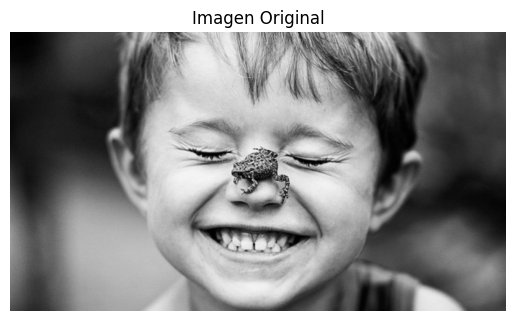

Imagen redimensionada para Instagram. Guardada como 'redimensionada_Instagram.jpg' con dimensiones: (1080, 1080)


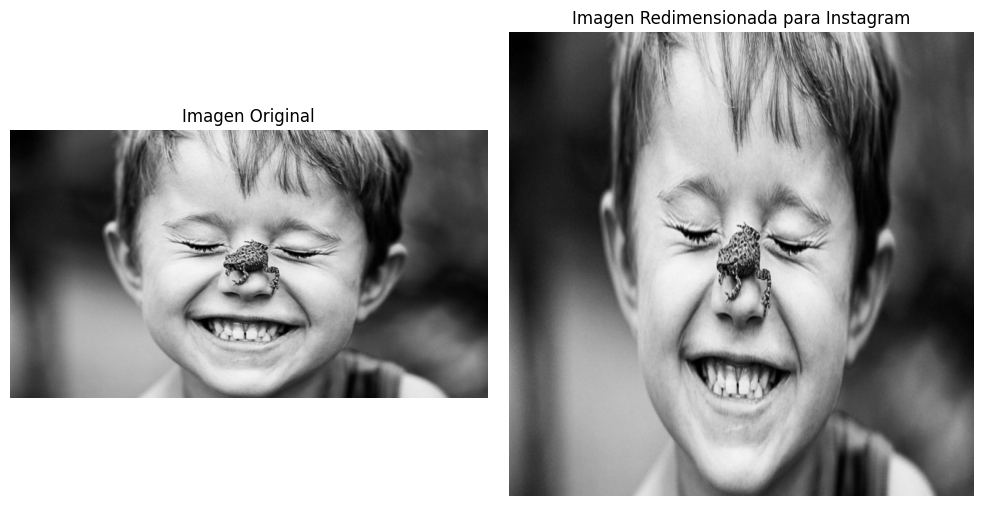

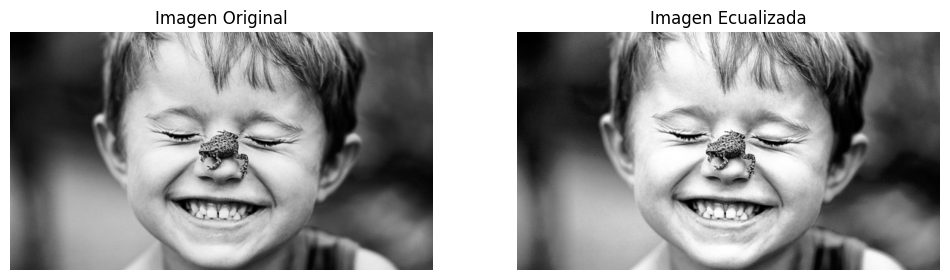

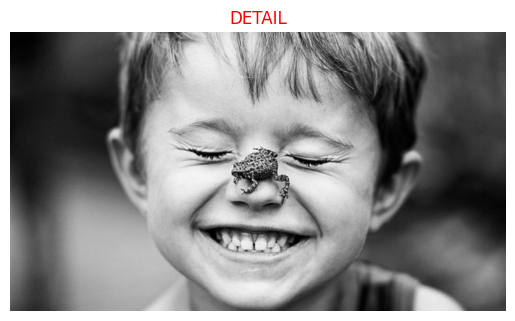

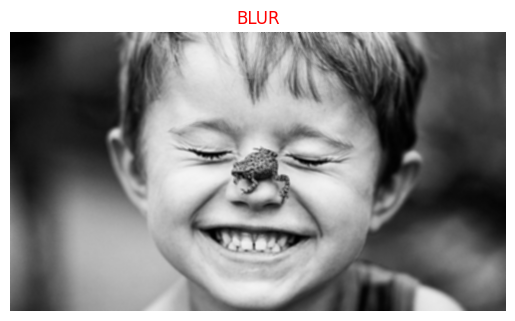

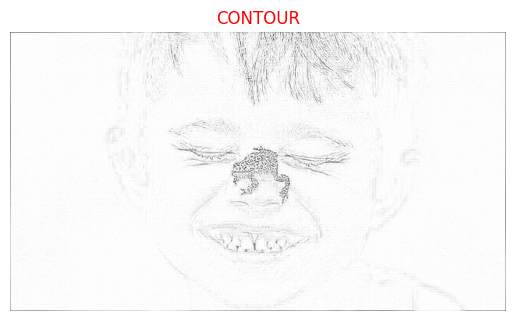

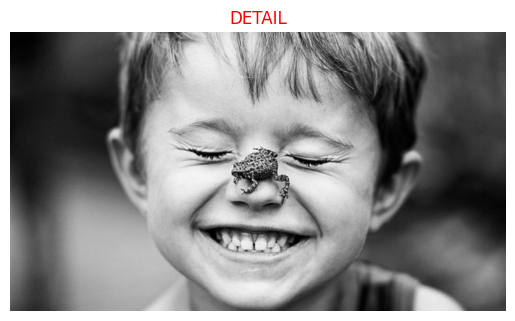

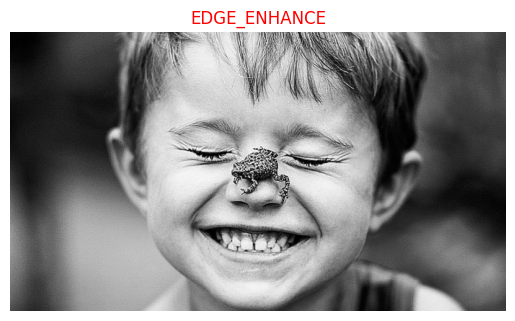

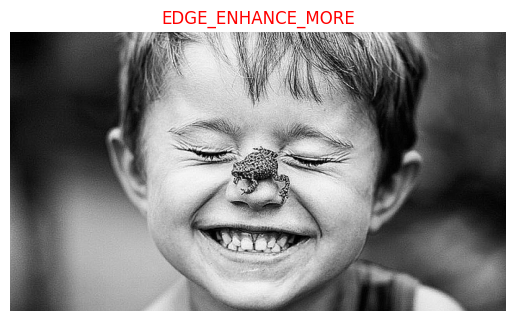

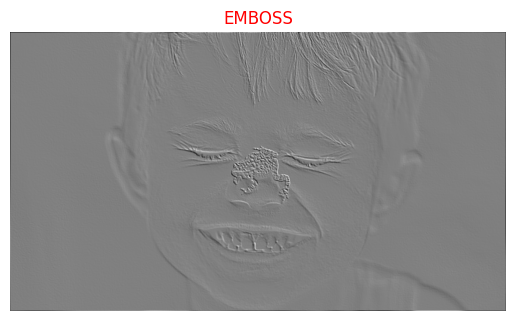

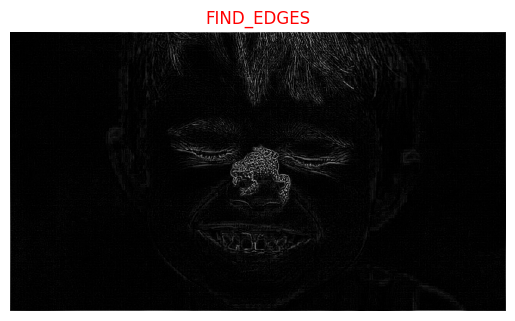

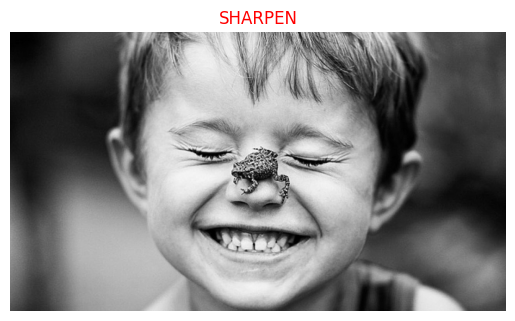

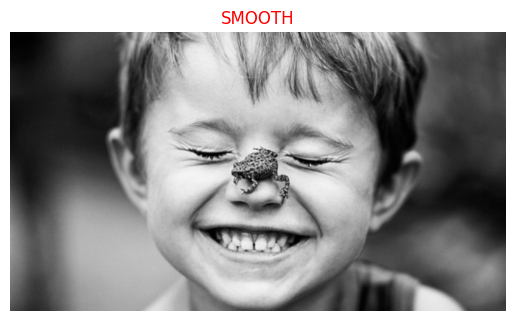

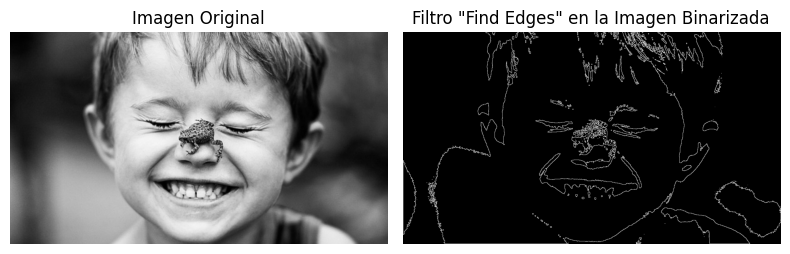

In [13]:
# Importa las funciones del módulo
from fotoapp import *

url_imagen = "https://github.com/Fabrici086/Imagenes/blob/main/boceto_2.jpg?raw=true"

# Descarga imagen desde GitHub
imagen_cargada = descargar_imagen_desde_github(url_imagen)
plt.imshow(imagen_cargada)
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Redimensiona la imagen para Instagram
plataforma_redimensionar = "Instagram"
redimensionar_imagen(url_imagen, plataforma_redimensionar)

# Ajusta contraste y ecualiza histograma
ajustar_contraste(url_imagen)

# Aplica el filtro DETAI a la imagen
filtro_a_aplicar = "DETAIL"
aplicar_filtro(imagen_cargada, filtro_a_aplicar)

# Aplica todos los filtros
aplicar_todos_filtros(imagen_cargada)

# Binariza la imagen y resalta los bordes
umbral = 100
imagen_binarizada = binarizar_imagen(imagen_cargada, umbral)


## Ejercicio 7

[Enlace al Repositorio en GitHub](https://github.com/Fabrici086/Proyecto_2_Procesamiento_de_Imagenes)